<a href="https://colab.research.google.com/github/Thurab/Alma-Better-Google-Play-store-Analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# READ DATASET OF PLAYSTATION
ps_data_df=pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/EDA/Playstore/Copy of Play Store Data.csv')

In [165]:
ps_data_df.shape

(10841, 13)

In [4]:
ps_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
ps_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#CREATING A COPY OF PLAYSTATION DATAFRAME
ps_data_df_copy=ps_data_df.copy()

## Exploring most installed apps and visualising top 5 most installed apps 



In [7]:
#CLEANING THE DATA OF INSTALLS COLUMN WHICH CONTAINS '+' SYMBOLS
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].apply(lambda x: str(x.strip('+')))

In [8]:
ps_data_df_copy['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [9]:
type(ps_data_df_copy['Installs'][0])

str

In [10]:
# REPLACING ',' WITH ''
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].apply(lambda x: str(x.replace(',','')))

In [11]:
#dropping 'Installs' row which have 'Free' value in it
ps_data_df_copy=ps_data_df_copy[ps_data_df_copy['Installs']!='Free']

In [12]:
ps_data_df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
type(ps_data_df_copy['Installs'][0])

str

In [14]:
#Converting the Installs column datatype to int
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].astype(int)

In [15]:
type(ps_data_df_copy['Installs'][0])

numpy.int64

In [163]:
ps_data_df_copy['Installs'].sum()

65065233464

In [16]:
# FINDING MOST INSTALLED APP IN PLAYSTORE
Res=ps_data_df_copy.groupby('App')['Installs'].sum().reset_index()
final_result=Res.sort_values(by='Installs',ascending=False).head(10)
print(f'Most installed app is {final_result.iloc[0][0]} with total installations of {final_result.iloc[0][1]}')
#final_result

Most installed app is Subway Surfers with total installations of 6000000000


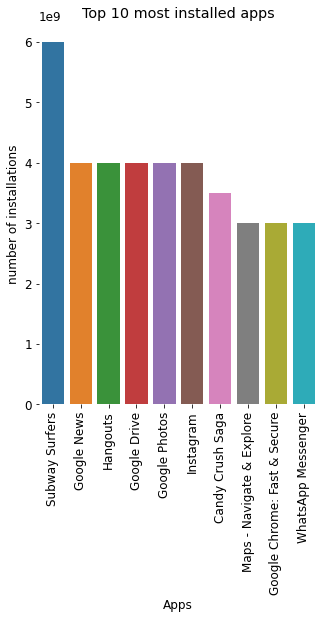

In [17]:
plt.rcParams["figure.figsize"]=(5,7)
plt.rcParams['font.size']=12.0
sns.barplot(x=final_result["App"],y=final_result["Installs"],data=final_result)
plt.xlabel("Apps")
plt.xticks(rotation=90)
plt.ylabel("number of installations")
plt.title('Top 10 most installed apps')
sns.despine(left=True, bottom=True)


In [18]:
final_result.head(5)

,App,Installs
8079,Subway Surfers,6000000000
4933,Google News,4000000000
5118,Hangouts,4000000000
4924,Google Drive,4000000000
4937,Google Photos,4000000000


In [19]:
total_no_of_installation=ps_data_df_copy['Installs'].sum()

In [20]:
print(f'{final_result.iloc[0][0]} is installed {final_result.iloc[0][1]} times which accounts for {round((final_result.iloc[0][1]/total_no_of_installation)*100,2)}% alone')
print(f'{final_result.iloc[1][0]} is installed {final_result.iloc[1][1]} times which accounts for {round((final_result.iloc[1][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[2][0]} is installed {final_result.iloc[2][1]} times which accounts for {round((final_result.iloc[2][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[3][0]} is installed {final_result.iloc[3][1]} times which accounts for {round((final_result.iloc[3][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[4][0]} is installed {final_result.iloc[4][1]} times which accounts for {round((final_result.iloc[4][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[5][0]} is installed {final_result.iloc[5][1]} times which accounts for {round((final_result.iloc[5][1]/total_no_of_installation)*100,2)}% alone')
print(f'{final_result.iloc[6][0]} is installed {final_result.iloc[6][1]} times which accounts for {round((final_result.iloc[6][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[7][0]} is installed {final_result.iloc[7][1]} times which accounts for {round((final_result.iloc[7][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[8][0]} is installed {final_result.iloc[8][1]} times which accounts for {round((final_result.iloc[8][1]/total_no_of_installation)*100,2)} % alone')
print(f'{final_result.iloc[9][0]} is installed {final_result.iloc[9][1]} times which accounts for {round((final_result.iloc[9][1]/total_no_of_installation)*100,2)} % alone')


Subway Surfers is installed 6000000000 times which accounts for 3.58% alone
Google News is installed 4000000000 times which accounts for 2.39 % alone
Hangouts is installed 4000000000 times which accounts for 2.39 % alone
Google Drive is installed 4000000000 times which accounts for 2.39 % alone
Google Photos is installed 4000000000 times which accounts for 2.39 % alone
Instagram is installed 4000000000 times which accounts for 2.39% alone
Candy Crush Saga is installed 3500000000 times which accounts for 2.09 % alone
Maps - Navigate & Explore is installed 3000000000 times which accounts for 1.79 % alone
Google Chrome: Fast & Secure is installed 3000000000 times which accounts for 1.79 % alone
WhatsApp Messenger is installed 3000000000 times which accounts for 1.79 % alone


## Visualising Categories


Text(0.5, 1.0, 'Category wise app counts')

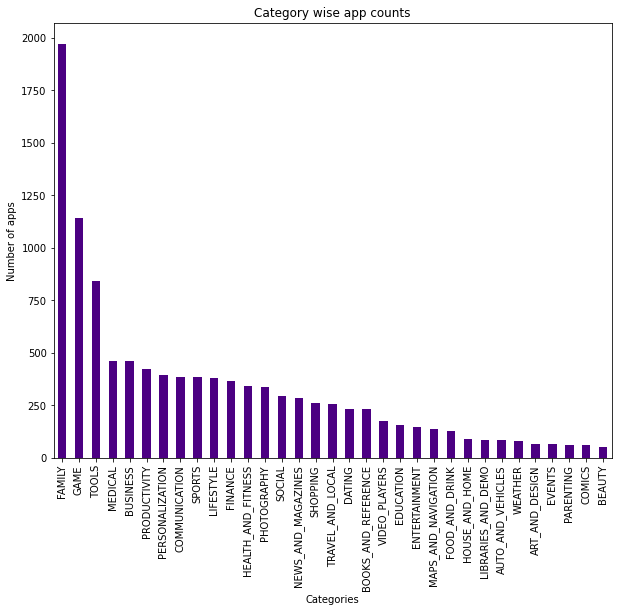

In [21]:
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['font.size']=10.0
ps_data_df_copy['Category'].value_counts().plot(kind='bar',color='indigo')
plt.xlabel('Categories')
plt.ylabel('Number of apps')
plt.title('Category wise app counts')


In [22]:
#TOP 5 FAMILY APPS
Family_category=ps_data_df_copy[ps_data_df_copy['Category']=='FAMILY']

In [23]:
Family_category_result=Family_category.sort_values('Installs',ascending=False).head(5).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

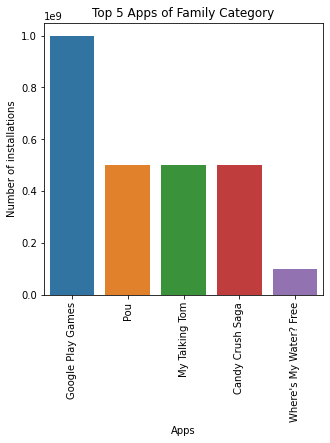

In [24]:
plt.rcParams["figure.figsize"]=(5,5)
plt.rcParams['font.size']=10.0
sns.barplot("App","Installs",data=Family_category_result)
plt.xlabel('Apps')
plt.ylabel('Number of installations')
plt.title('Top 5 Apps of Family Category')
plt.xticks(rotation=90)


In [25]:
Family_category_result.head(5)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1,3879,Pou,FAMILY,4.3,10483141,24M,500000000,Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
2,3888,My Talking Tom,FAMILY,4.5,14885236,Varies with device,500000000,Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
3,3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,500000000,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
4,4229,Where's My Water? Free,FAMILY,4.4,1372013,57M,100000000,Free,0,Everyone,Puzzle;Brain Games,"November 21, 2017",1.10.0,4.1 and up


In [26]:
# TOP 5 GAMING APPS
Gaming_category=ps_data_df_copy[ps_data_df_copy['Category']=='GAME']
Gaming_category_result=Gaming_category.drop_duplicates(subset='App').sort_values(by='Installs',ascending=False).head(5)
#Gaming_category.sort_values(by='Installs',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

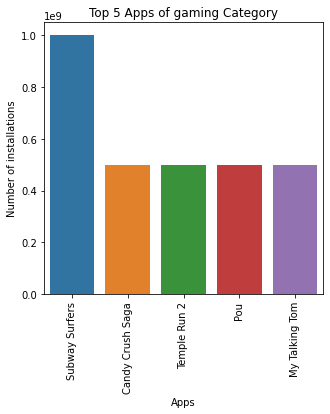

In [27]:
# Gaming_category_result=Gaming_category.sort_values('Installs',ascending=False).head(5).reset_index()
# Gaming_category_result
plt.rcParams["figure.figsize"]=(5,5)
plt.rcParams['font.size']=10.0
sns.barplot("App","Installs",data=Gaming_category_result)
plt.xlabel('Apps')
plt.ylabel('Number of installations')
plt.title('Top 5 Apps of gaming Category')
plt.xticks(rotation=90)

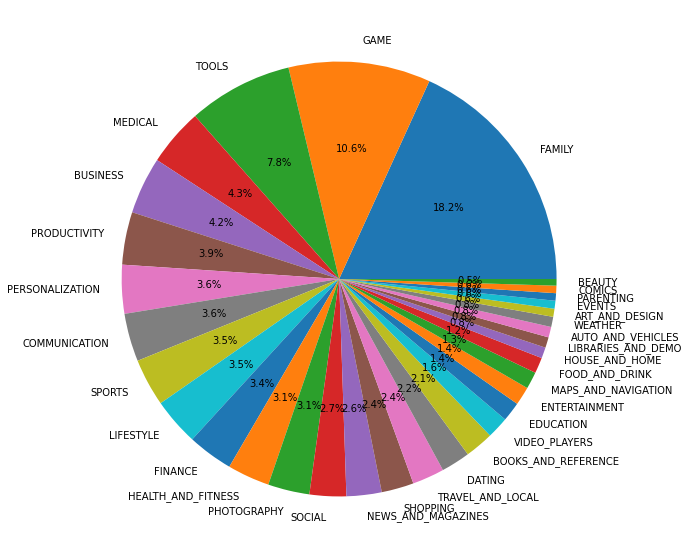

In [28]:
#Pie Chart for Category
ps_data_df_copy['Category'].unique()
Unique_categories_count=ps_data_df_copy['Category'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(Unique_categories_count,labels=list(Unique_categories_count.index) ,autopct= "%1.1f%%")
plt.show()

## EXPLORING PAID AND FREE APPS

In [29]:
Free_Apps=len(ps_data_df_copy[ps_data_df_copy['Type']=='Free'])
Paid_Apps=len(ps_data_df_copy[ps_data_df_copy['Type']=='Paid'])

print(f'Total free apps= {Free_Apps}')
print(f'Total paid apps= {Paid_Apps}')

Total free apps= 10039
Total paid apps= 800


In [30]:
#Create a DF to analyse Free and Paid apps
Free_paid_df=ps_data_df_copy.copy()

In [31]:
# drop 'Varies with device' in dataframe
Free_paid_df['Size']=Free_paid_df['Size'].apply(lambda x: x.replace('Varies with device','').replace('M','').replace('k',''))

In [32]:
Free_paid=Free_paid_df.groupby('Type')['App'].count()
Free_paid

Type
Free    10039
Paid      800
Name: App, dtype: int64

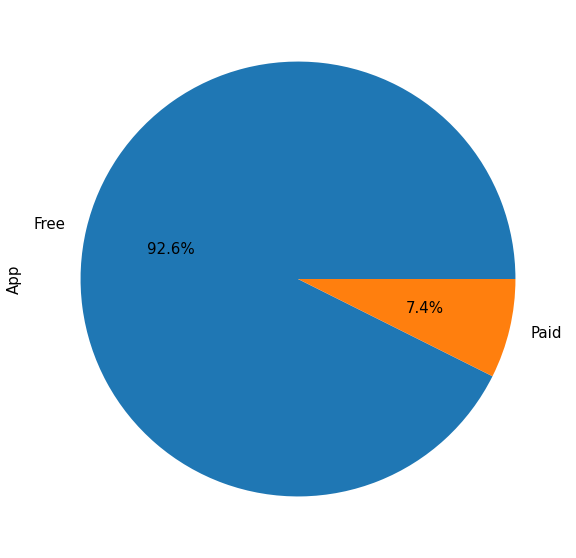

In [168]:
plt.rcParams["figure.figsize"]=(10,10)
plt.rcParams["font.size"]=15.0
Free_paid.plot.pie(autopct="%.1f%%")

In [34]:
# Extracting maximum price of the paid apps
Free_paid_df["Price"]=Free_paid_df["Price"].apply(lambda x: x.replace('$',''))

In [35]:
# Converting the Price column as Numeric
Free_paid_df['Price']=pd.to_numeric(Free_paid_df['Price'],errors='coerce')

In [36]:
#Creating a new DF for Paid only apps
Paid_df=Free_paid_df[Free_paid_df['Type']=='Paid'].reset_index()

In [37]:
Paid_df['Price'].idxmax(axis=0)

215

In [38]:
Paid_df.iloc[215]

index                                 4367
App               I'm Rich - Trump Edition
Category                         LIFESTYLE
Rating                                 3.6
Reviews                                275
Size                                   7.3
Installs                             10000
Type                                  Paid
Price                                  400
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Name: 215, dtype: object

In [39]:
#PRINTING COSTLIEST APP
print(f'The costliest Paid app is {Paid_df.iloc[215][1]} with a cost of ${Paid_df.iloc[215][8]} and the app has total installations of {Paid_df.iloc[215][6]}+')

The costliest Paid app is I'm Rich - Trump Edition with a cost of $400.0 and the app has total installations of 10000+


In [40]:
print(f"The total paid apps installed in play store by the users is {round(Paid_df['Installs'].sum()/1000000,2)} Million")

The total paid apps installed in play store by the users is 72.96 Million


In [41]:
#Top 5 most installed paid apps
top_five_paid_apps=Paid_df.drop_duplicates('App').sort_values('Installs',ascending=False).head(5)

In [42]:
top_five_paid_apps

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
175,4034,Hitman Sniper,GAME,4.6,408292,29,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
61,2241,Minecraft,FAMILY,4.5,2376564,,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
375,5631,Five Nights at Freddy's,GAME,4.6,100805,50,1000000,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up
662,8860,Bloons TD 5,FAMILY,4.6,190086,94,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
158,3405,HD Widgets,PERSONALIZATION,4.3,58617,26,1000000,Paid,0.99,Everyone,Personalization,"December 7, 2016",4.3.2,4.4 and up


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


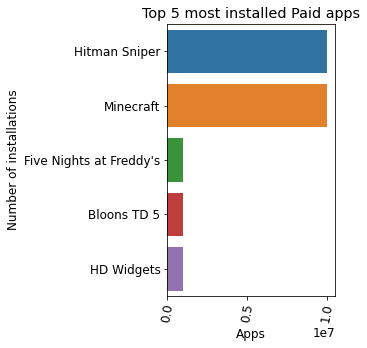

In [43]:
#Using seaborn bar plot
#plt.bar("App","Installs",data=top_five_paid_apps,color="green")
plt.rcParams["figure.figsize"]=(3,5)
plt.rcParams['font.size']=12.0
sns.barplot(top_five_paid_apps['Installs'],top_five_paid_apps['App'])
plt.xlabel('Apps')
plt.ylabel('Number of installations')
plt.title('Top 5 most installed Paid apps')
plt.xticks(rotation=80)
plt.show()

In [44]:
# Exploring Paid Apps Category
Paid_category=Paid_df.groupby('Category')['Installs'].sum().reset_index()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


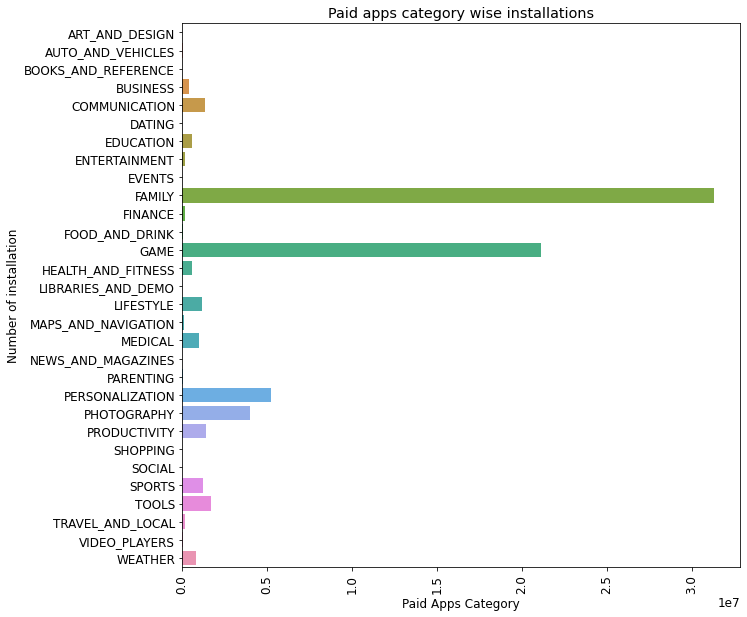

In [45]:
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=12.0
sns.barplot(Paid_category['Installs'],Paid_category['Category'])
#plt.bar('Category','Installs',data=Paid_category)
plt.xlabel('Paid Apps Category')
plt.ylabel('Number of installation')
plt.title('Paid apps category wise installations')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Category wise Paid app counts')

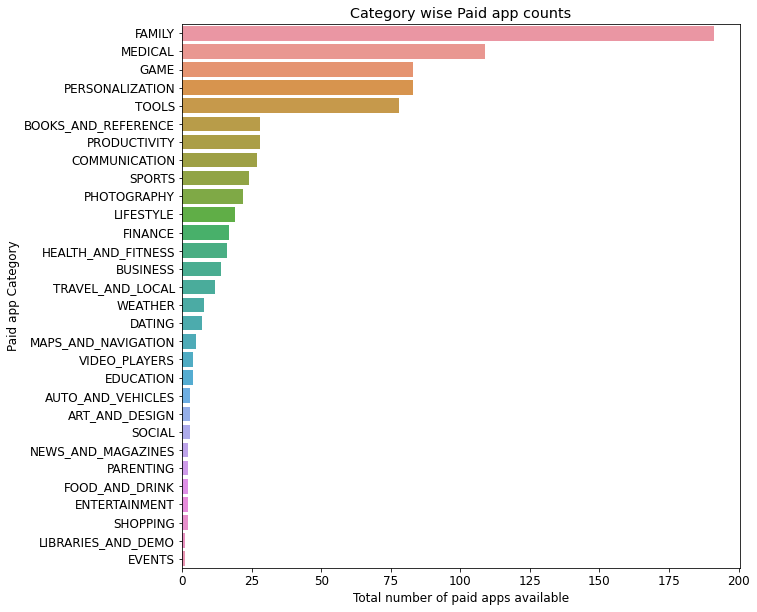

In [46]:
# TOTAL PAID APPS CATEGORY WISE
Paid_app_category_counts=Paid_df['Category'].value_counts()
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=12.0
sns.barplot(Paid_app_category_counts,Paid_app_category_counts.index)
plt.xlabel('Total number of paid apps available')
plt.ylabel('Paid app Category')
plt.title('Category wise Paid app counts')

In [47]:
#EXPLORING FREE APPS AND ITS CATEGORY.
#CREATING A DF FOR FREE APPS ONLY
Free_app_df=Free_paid_df[Free_paid_df['Type']=='Free'].reset_index()

In [48]:
print(f"The total free apps installed in play store by the users is {round(Free_app_df['Installs'].sum()/1000000000 ,2)} Billion")

The total free apps installed in play store by the users is 167.56 Billion


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


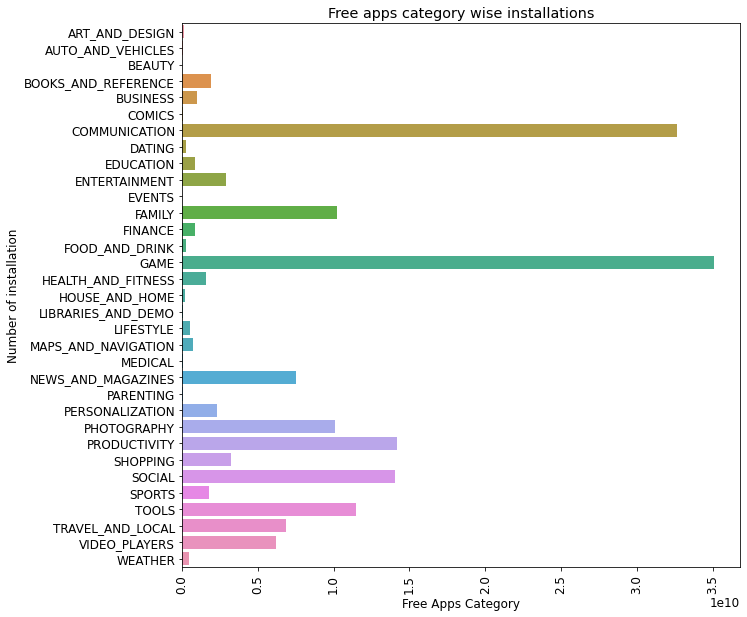

In [49]:
Free_category=Free_app_df.groupby('Category')['Installs'].sum().reset_index()
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=12.0
sns.barplot(Free_category['Installs'],Free_category['Category'])
plt.xlabel('Free Apps Category')
plt.ylabel('Number of installation')
plt.title('Free apps category wise installations')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Category wise Free app counts')

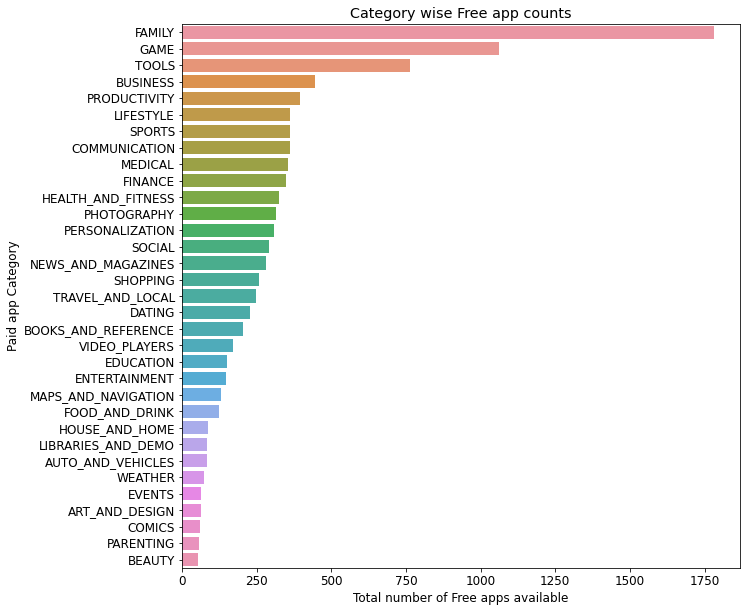

In [167]:
# TOTAL FREE APPS CATEGORY WISE
Free_category=Free_app_df['Category'].value_counts()
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=12.0
sns.barplot(Free_category,Free_category.index)
plt.xlabel('Total number of Free apps available')
plt.ylabel('Paid app Category')
plt.title('Category wise Free app counts')

## Exploring Ratings

In [51]:
#Making Reviews column to numeric
# to_numeric function is to convert datatype to integer values and errors passed as 'coerce' which returns 'NAN if invalid parsing, 
ps_data_df_copy['Reviews']=pd.to_numeric(ps_data_df_copy['Reviews'],errors='coerce')

In [52]:
# PRINTING TOTAL COUNT OF REVIEWS
total_reviewed_app_count=ps_data_df_copy.sort_values('Reviews',ascending=False)['Reviews'].sum()
print(f'The total count of reviews available in Google play store is {round(total_reviewed_app_count/1000000000,2)} Billion')

The total count of reviews available in Google play store is 4.81 Billion


In [53]:
most_reviewed_app=ps_data_df_copy.sort_values('Reviews',ascending=False).iloc[0]['App']
most_reviewed_app_reviews_count=ps_data_df_copy.sort_values('Reviews',ascending=False).iloc[0]['Reviews']
print(f'Most reviewed app is {most_reviewed_app} with {int(most_reviewed_app_reviews_count)} reviews')

Most reviewed app is Facebook with 78158306 reviews


In [54]:
rating_data=ps_data_df_copy.groupby('Rating')['Installs'].sum().reset_index()
rating_data.head(2)

,Rating,Installs
0,1.0,5170
1,1.2,1000


Text(0.5, 0, 'Rating')

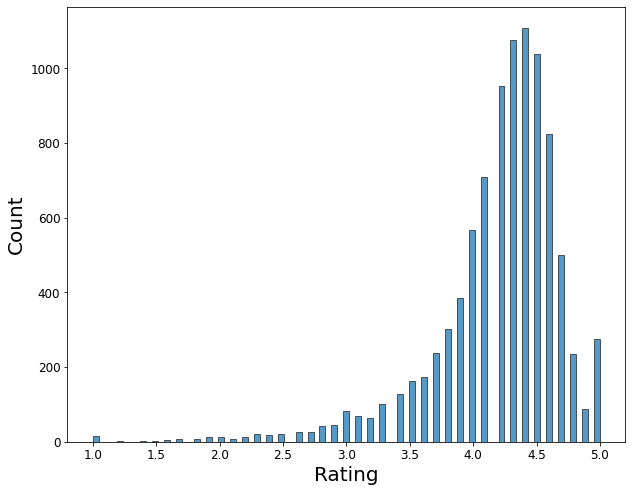

In [55]:
plt.figure(figsize=(10,8))
sns.histplot(x='Rating',data=ps_data_df_copy)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Rating', fontsize=20)

In [56]:
ps_data_df_copy['Content Rating'].value_counts(sort=True)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [57]:
list(ps_data_df_copy['Content Rating'].value_counts(sort=True).index)

['Everyone',
 'Teen',
 'Mature 17+',
 'Everyone 10+',
 'Adults only 18+',
 'Unrated']

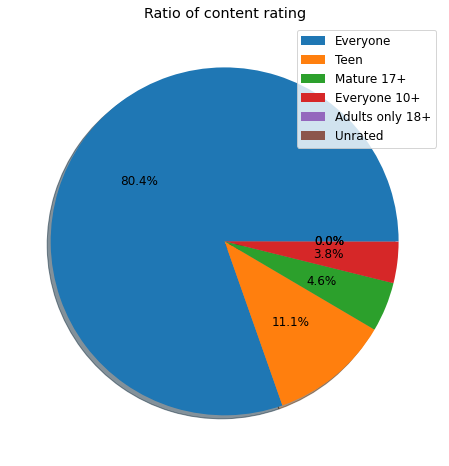

In [58]:
# PLOTTING PIE CHART BASED ON CONTENT RATING
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['font.size']=12.0
plt.title('Ratio of content rating')
size=ps_data_df_copy['Content Rating'].value_counts(sort=True)
label_value=ps_data_df_copy['Content Rating'].value_counts(sort=True).index
# label_value=['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+', 'Adults only 18+', 'Unrated']
plt.pie(size,autopct= "%1.1f%%",shadow=True)
plt.legend(label_value,loc='best')
plt.show()

In [59]:
#5 star rated apps with atleast 1000+ reviews
rating_df=ps_data_df_copy[~ps_data_df_copy['Rating'].isna()]

In [60]:
rate=rating_df[rating_df['Rating']==5]
print(f"The total 5 starred app in Google play store are {rate.shape[0]} apps")

The total 5 starred app in Google play store are 274 apps


Text(0.5, 1.0, 'Category wise 5 Starred app counts')

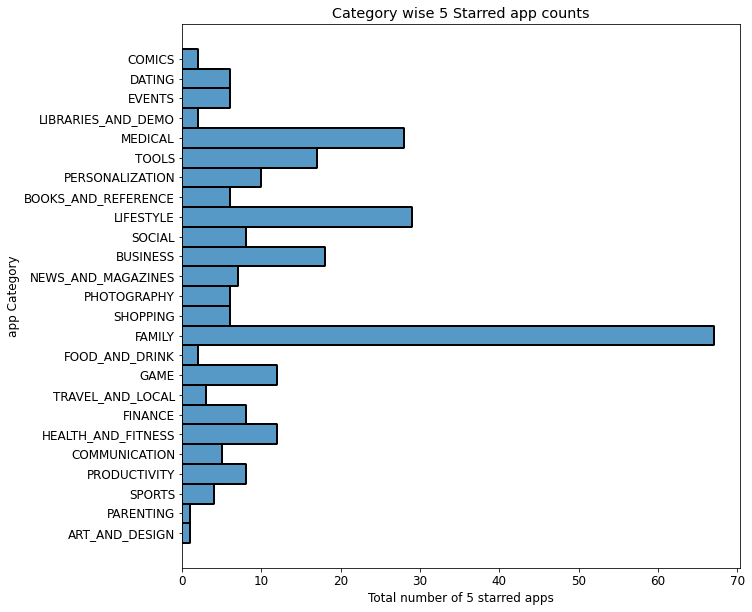

In [61]:
# 5 STARRED APPS CATEGORY WISE
Paid_app_category_counts=Paid_df['Category'].value_counts()
plt.rcParams['figure.figsize']=(10,10)
plt.rcParams['font.size']=12.0
sns.histplot(y='Category',data=rate)
plt.xlabel('Total number of 5 starred apps')
plt.ylabel('app Category')
plt.title('Category wise 5 Starred app counts')

In [172]:
five_star_apps_with_most_ratings=rate[rate['Installs']>1000]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


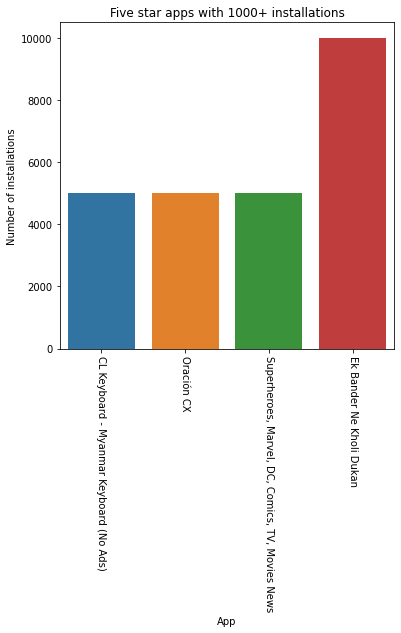

In [173]:
plt.rcParams['font.size']=10.0
plt.rcParams['figure.figsize']=(6,6)
sns.barplot(five_star_apps_with_most_ratings['App'],five_star_apps_with_most_ratings['Installs'])
plt.title('Five star apps with 1000+ installations')
plt.xlabel('App')
plt.ylabel('Number of installations')

plt.xticks(rotation=270)
plt.show()

In [64]:
ps_data_df_copy[ps_data_df_copy['App']=='Ek Bander Ne Kholi Dukan']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0M,10000,Free,0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0 and up


## Exploring Genres and Android versions


Text(0.5, 1.0, 'Number of Apps supports Android versions')

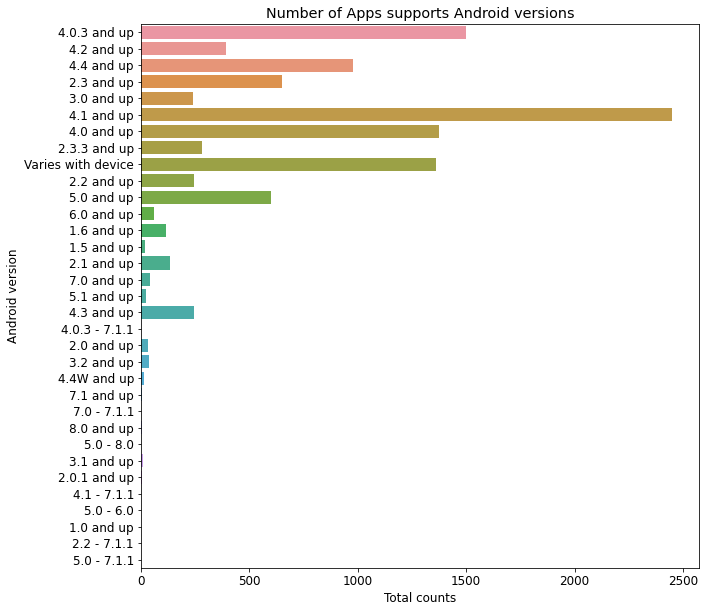

In [65]:
plt.rcParams['font.size']=12.0
plt.rcParams['figure.figsize']=(10,10)
sns.countplot(y=ps_data_df_copy['Android Ver'])
plt.xlabel('Total counts')
plt.ylabel('Android version')
plt.title('Number of Apps supports Android versions')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most installation based on genres')

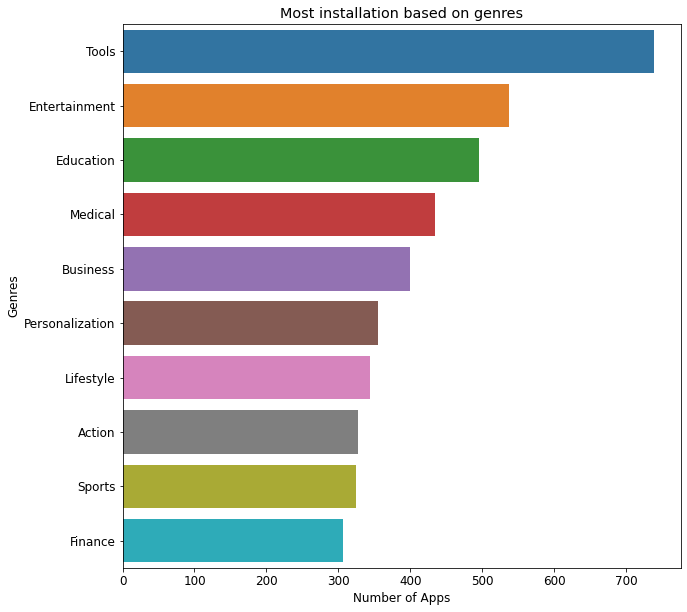

In [127]:
genres=ps_data_df_copy['Genres'].value_counts().head(10)
plt.rcParams['font.size']=12.0
plt.rcParams['figure.figsize']=(10,10)
sns.barplot(genres,genres.index)
plt.xlabel('Number of Apps')
plt.ylabel('Genres')
plt.title('Most installation based on genres')

## ***Exploring with the Second dataset*** 

In [71]:
user_review_df=pd.read_csv('/content/drive/MyDrive/Alma Better/Capstone Projects/EDA/Playstore/Copy of User Reviews.csv')

In [72]:
user_review_df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [73]:
#LOOKING NUMBER OF NULL COLUMNS
user_review_df.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [74]:
user_review_df.shape

(64295, 5)

In [75]:
#COPY OF ORRIGINAL DATA
user_review_df_copy=user_review_df.copy()

In [76]:
# DROP NULL VALUES
user_review_df_copy=user_review_df_copy.dropna()

In [77]:
user_review_df_copy.shape

(37427, 5)

## Exploring Sentiment


In [78]:
sentiment=user_review_df_copy['Sentiment'].value_counts().reset_index()


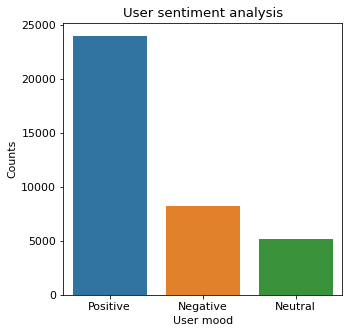

In [129]:
plt.rcParams['font.size']=11.0
plt.rcParams['figure.figsize']=(5,5)
sns.barplot(x=sentiment['index'],y=sentiment['Sentiment'],data=sentiment)
plt.xlabel('User mood')
plt.ylabel('Counts')
plt.title('User sentiment analysis')
plt.show()

In [80]:
negative_review_df=user_review_df_copy[user_review_df_copy['Sentiment']=='Negative']

In [81]:
negative_review=negative_review_df.groupby('App')['Sentiment_Polarity'].count().reset_index()
negative_review=negative_review.sort_values('Sentiment_Polarity',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


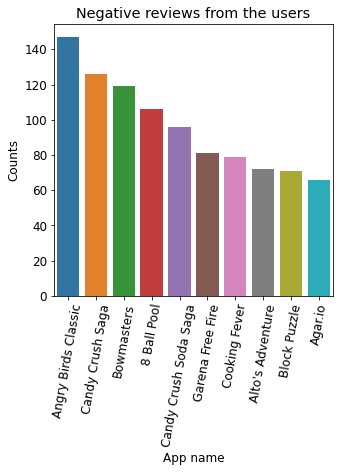

In [82]:
sns.barplot(negative_review['App'],negative_review['Sentiment_Polarity'])
plt.xlabel('App name')
plt.ylabel('Counts')
plt.title('Negative reviews from the users')
plt.rcParams['font.size']=12.0
plt.rcParams['figure.figsize']=(6,8)
plt.xticks(rotation=80)
plt.show()


In [83]:
angry_bird_app_negative_review=negative_review_df[negative_review_df['App']=='Angry Birds Classic'].head(5)


In [84]:
#DIPLAY FULL TEXT OF THE USER REVIEW
pd.set_option('display.max_colwidth',None)
angry_bird_app_negative_review['Translated_Review'].reset_index()

,index,Translated_Review
0,7352,"Way many ads. I remember Angry Birds first came fun. Now nothing constant ads forced videos timers proceed. Makes game virtually unplayable, I've uninstalled it. A shame, too. But I'm going held hostage ads videos. Bad enough YouTube it. And Rovio YouTube."
1,7353,"Angry Birds used game could tap play heart's content. Now gone fee-to-pay (sic) -- read reviews see well received. Not well understatement. I'd say more, gain 50 stars read new paragraph. Meanwhile, watch unskippable half-minute-long ads."
2,7356,"The ""Mighty League"" part unplayable. It constantly freezes. After close everything start freeze again. Rovio known years care less. Don't waste time"
3,7359,I played angry birds since first started. I've loved since beginning. I loved idea tournament. However game freezes A LOT. I wrote tech support months months ago yet I told oh I'll deal it. I've lost lot powerups coins freezing. I'm frustrated point considering paying while. I've changed several phones freezes every them. I'm disappointed.
4,7361,"You know games worry life left, angry birds worry round forced see another terrible ad... Hate them! Love game tho."


In [85]:
# Explore Positve reviews
positive_review_df=user_review_df_copy[user_review_df_copy['Sentiment']=='Positive']

In [86]:
positive_review=positive_review_df.groupby('App')['Sentiment_Polarity'].count().reset_index()
positive_review=positive_review_df.sort_values('Sentiment_Polarity',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


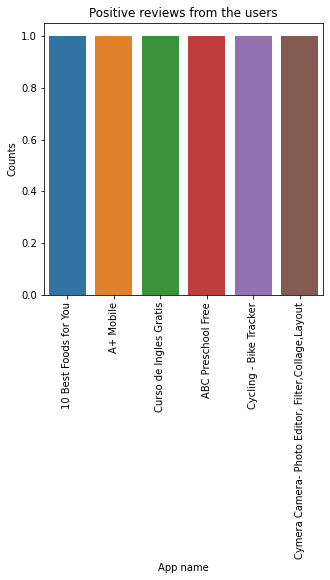

In [137]:
plt.rcParams['font.size']=10.0
plt.rcParams['figure.figsize']=(5,5)
sns.barplot(positive_review['App'],positive_review['Sentiment_Polarity'])
plt.xlabel('App name')
plt.ylabel('Counts')
plt.title('Positive reviews from the users')
plt.xticks(rotation=90)
plt.show()

In [133]:
pd.set_option('display.max_colwidth',None)
positive_review_df['Translated_Review'].reset_index().head(3)

,index,Translated_Review
0,0,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)"""
1,1,This help eating healthy exercise regular basis
2,3,Works great especially going grocery store


In [88]:
#Neutral review aps
neutral_review_df=user_review_df_copy[user_review_df_copy['Sentiment']=='Neutral']

In [89]:
neutral_review=neutral_review_df.groupby('App')['Sentiment_Polarity'].count().reset_index()
neutral_review=neutral_review.sort_values('Sentiment_Polarity',ascending=False).head(10)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


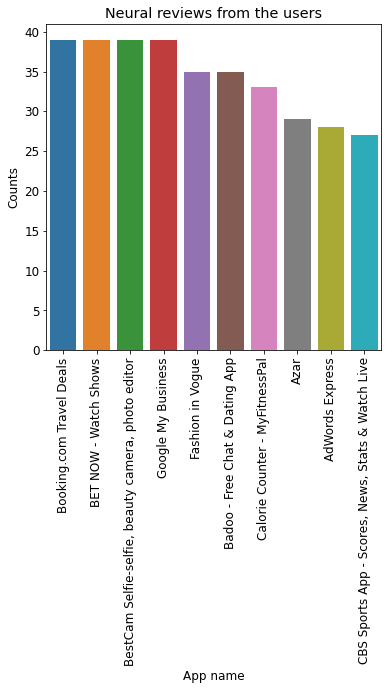

In [139]:
plt.rcParams['font.size']=12.0
plt.rcParams['figure.figsize']=(6,6)
sns.barplot(neutral_review['App'],neutral_review['Sentiment_Polarity'])
plt.xlabel('App name')
plt.ylabel('Counts')
plt.title('Neural reviews from the users')
plt.xticks(rotation=90)
plt.show()

In [157]:
# pd.set_option('display.max_colwidth',None)
neutral=neutral_review_df[neutral_review_df['App']=='Azar']
pd.option_context('display.max_colwidth',None)
neutral['Translated_Review'].reset_index().head(5)

,index,Translated_Review
0,9826,There lot ads people go
1,9829,I have a problem in Azar I have been banned for no reason please solve the problem ASAP
2,9835,I bay VIP package. After report I blocked . Thats frist VIP package
3,9841,Over heating battery issue app.
4,9846,I want talk foreigner come always men
